In [107]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
# Loading dataset
file_path = 'owid_covid_data_us_subset.csv'
covid_data = pd.read_csv(file_path)

# 1. Initial Inspection
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(covid_data.head())

# # Check basic info to understand data types and non-null counts
# print("\nDataset Info:")
# covid_data.info()

# # Check for missing values
# print("\nMissing Values:")
# print(covid_data.isnull().sum())

# # Get basic statistics
# print("\nBasic Statistics:")
# print(covid_data.describe(include='all'))

First few rows of the dataset:
         date  total_cases  new_cases  total_deaths  new_deaths  \
0  2020-07-21    3853351.0    60012.0      145801.0       932.0   
1  2020-07-22    3911870.0    58519.0      146668.0       867.0   
2  2020-07-23    3975206.0    63336.0      147861.0      1193.0   
3  2020-07-24    4047622.0    72416.0      149052.0      1191.0   
4  2020-07-25    4120764.0    73142.0      150306.0      1254.0   

   total_cases_per_million  total_deaths_per_million  icu_patients  \
0                11390.679                   430.994       11458.0   
1                11563.663                   433.557       12487.0   
2                11750.887                   437.084       13916.0   
3                11964.952                   440.604       13627.0   
4                12181.163                   444.311       14402.0   

   hosp_patients  weekly_hosp_admissions  daily_case_change_rate  \
0        42195.0                 30552.0                     NaN   
1        

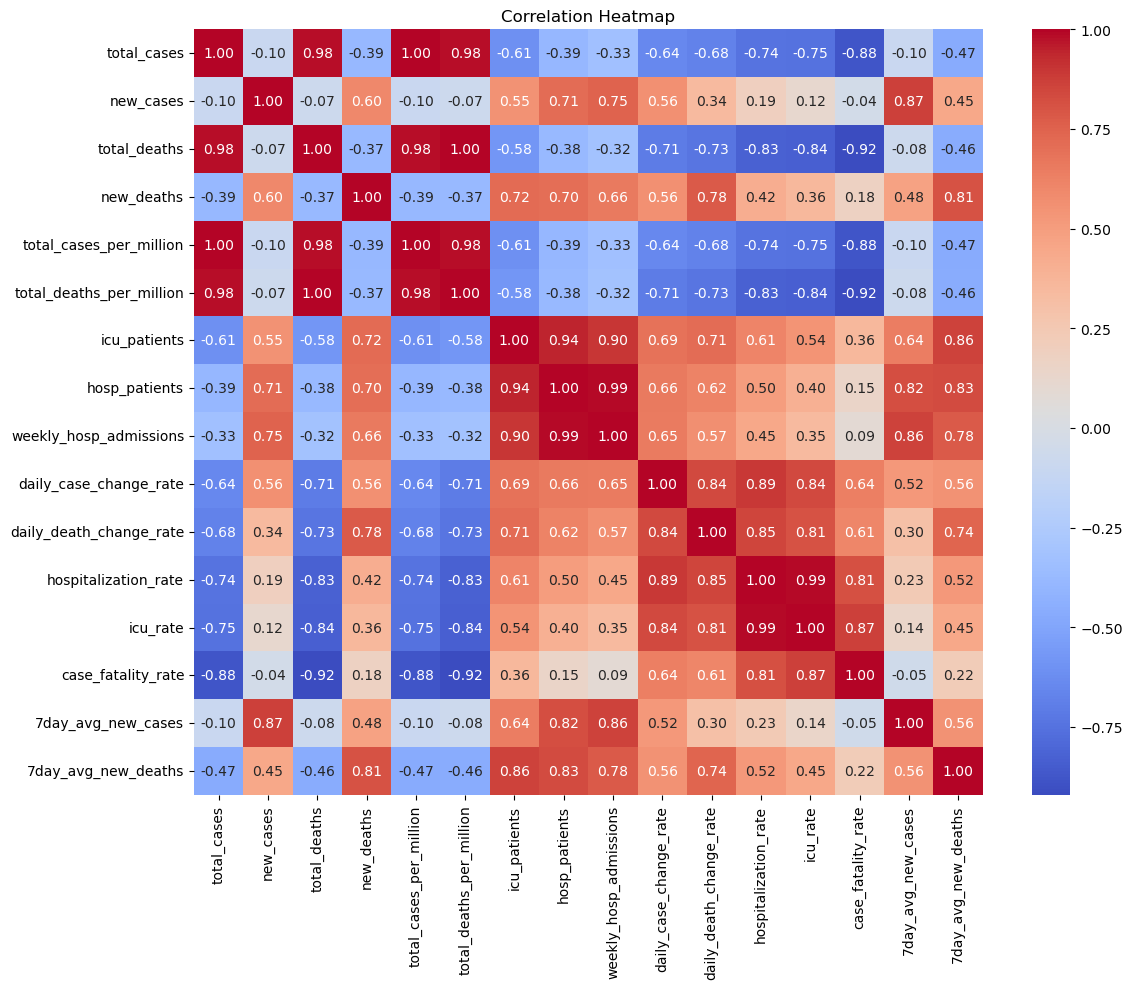

In [109]:
# Correlation heatmap for numerical features
numeric_data = covid_data.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
# print(correlation_matrix)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# Interpretations based on correlation heatmap

High Positive Correlations:

- total_cases and total_deaths (0.98): A strong positive correlation suggests that as total cases increase, total deaths also tend to increase proportionally.
- icu_patients, hosp_patients, and weekly_hosp_admissions all show strong correlations (>0.90), indicating these hospitalization metrics are closely related.
- total_cases_per_million and total_deaths_per_million (0.98): These metrics are naturally correlated since they scale similarly across the population.

Negative Correlations:
- hospitalization_rate and total_cases (-0.74): A negative correlation suggests that hospitalization rates may decrease as total cases increase, possibly due to resource allocation or prioritization shifts.
- daily_case_change_rate and total_cases (-0.64): As the total cases accumulate, the daily growth rate tends to decrease, reflecting a "flattening" curve.

Moderate Correlations:
- new_cases and 7day_avg_new_cases (0.87): A strong, but slightly imperfect, relationship between daily new cases and the rolling 7-day average, likely due to daily fluctuations.
- new_deaths and icu_patients (0.72): The relationship between new deaths and ICU patients suggests that ICU occupancy correlates with severe outcomes.

Interesting Patterns:
- daily_death_change_rate and new_deaths (0.78): The rate of change in daily deaths correlates reasonably well with the count of new deaths, reflecting trends in severity.
- new_cases and total_cases (-0.10): A weak negative correlation suggests that the count of new cases may not strongly depend on the cumulative total, highlighting dynamic changes in the epidemic's progression.


# ICU-related Metrics

*Correlations of icu_patients:*

Positive Correlations:
- hosp_patients (0.94): This strong correlation indicates that ICU occupancy is closely related to overall hospital admissions, as expected. The number of ICU patients is a subset of the hospitalized population.
- weekly_hosp_admissions (0.90): Weekly hospital admissions also correlate strongly with ICU patients, suggesting that new admissions may contribute to ICU occupancy trends.
- new_deaths (0.72): A notable correlation shows that as ICU occupancy increases, new deaths also tend to rise. This suggests ICU occupancy is a potential indicator of severe outcomes.
- daily_death_change_rate (0.71): Indicates that fluctuations in ICU patients align with changes in daily death rates, which could reflect the severity of cases in the ICU.

Moderate Positive Correlations:
- new_cases (0.55): ICU occupancy shows a moderate correlation with new cases, which suggests that ICU occupancy is affected by recent case surges but is not a direct or immediate consequence.
- daily_case_change_rate (0.66): Suggests that changes in daily case rates have a moderate influence on ICU patient trends, indicating a delayed effect of case surges on ICU utilization.

Negative Correlations:
- total_cases (-0.61): A moderate negative correlation shows that ICU occupancy decreases as cumulative cases rise, likely reflecting shifts in the progression of the pandemic (e.g., milder cases over time, better management, or resource allocation).

*Correlations of icu_rate:*

Positive Correlations:
- hospitalization_rate (0.85): A strong correlation between ICU rates and hospitalization rates indicates that ICU utilization scales proportionally with overall hospital usage.
- icu_patients (0.99): Nearly perfect correlation, as expected, since ICU rates depend directly on ICU patient counts.

Moderate Positive Correlations:
- weekly_hosp_admissions (0.84): Weekly hospital admissions influence ICU rates but not as directly as ICU counts, suggesting some variability in hospital-to-ICU conversion rates.
- daily_case_change_rate (0.66) and daily_death_change_rate (0.65): These moderate correlations suggest that ICU rates are influenced by changes in cases and deaths, reflecting pandemic severity and hospital stress.

Negative Correlations:
- total_cases (-0.75): Similar to icu_patients, ICU rates decrease as cumulative cases grow, likely due to a decrease in the proportion of severe cases over time or improved medical interventions.
- total_deaths (-0.84): Indicates that ICU rates decline as deaths accumulate, reflecting a shift in population risk or case severity over time.


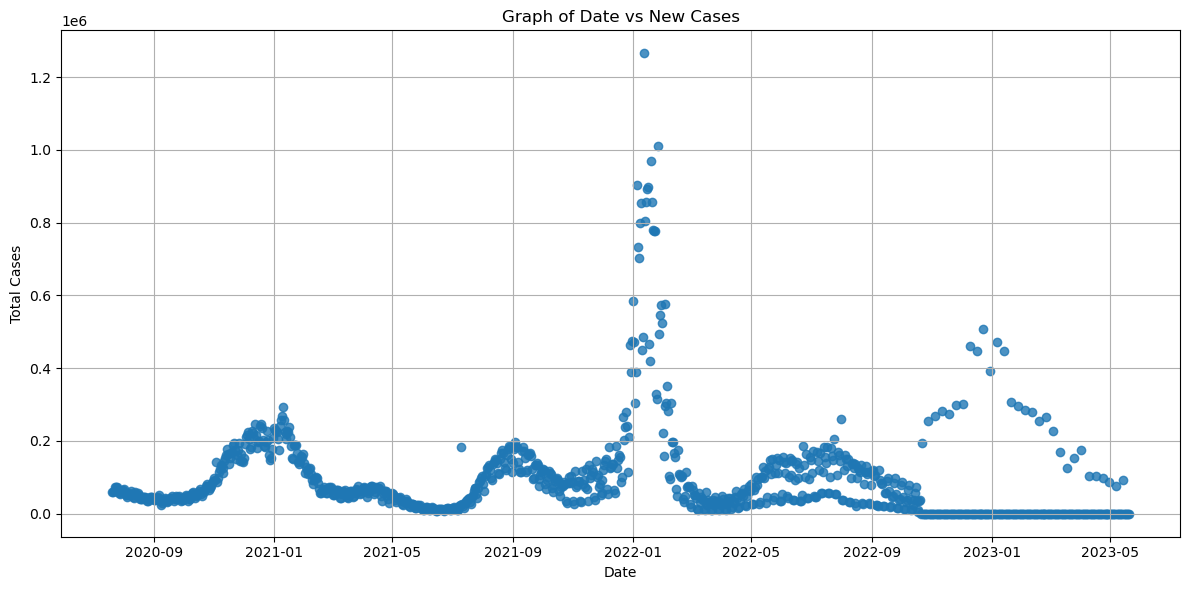

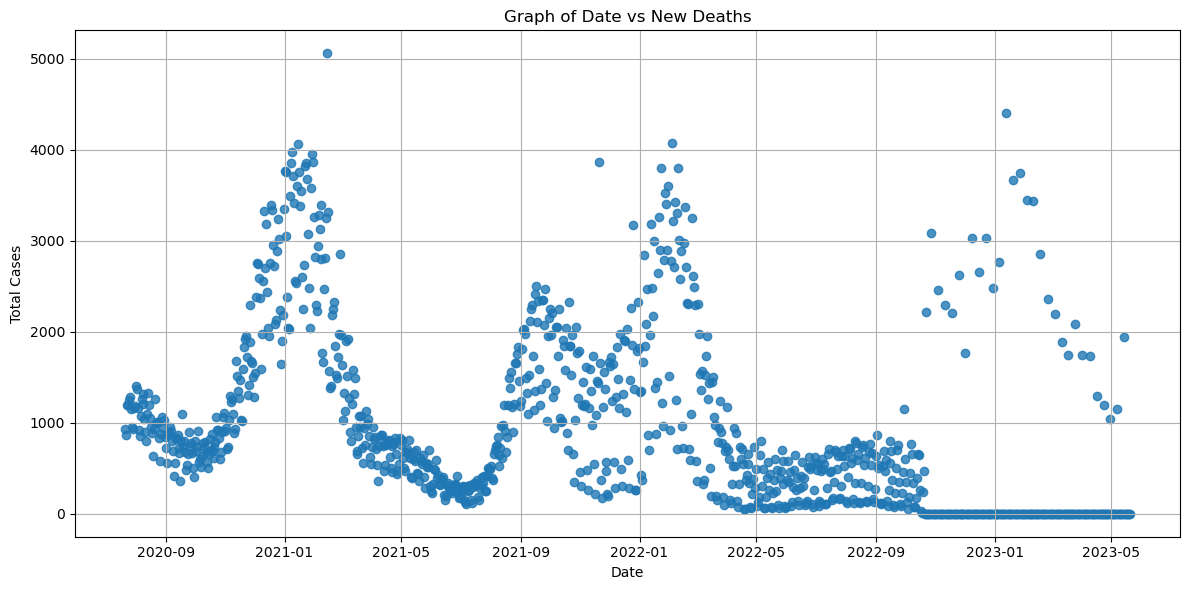

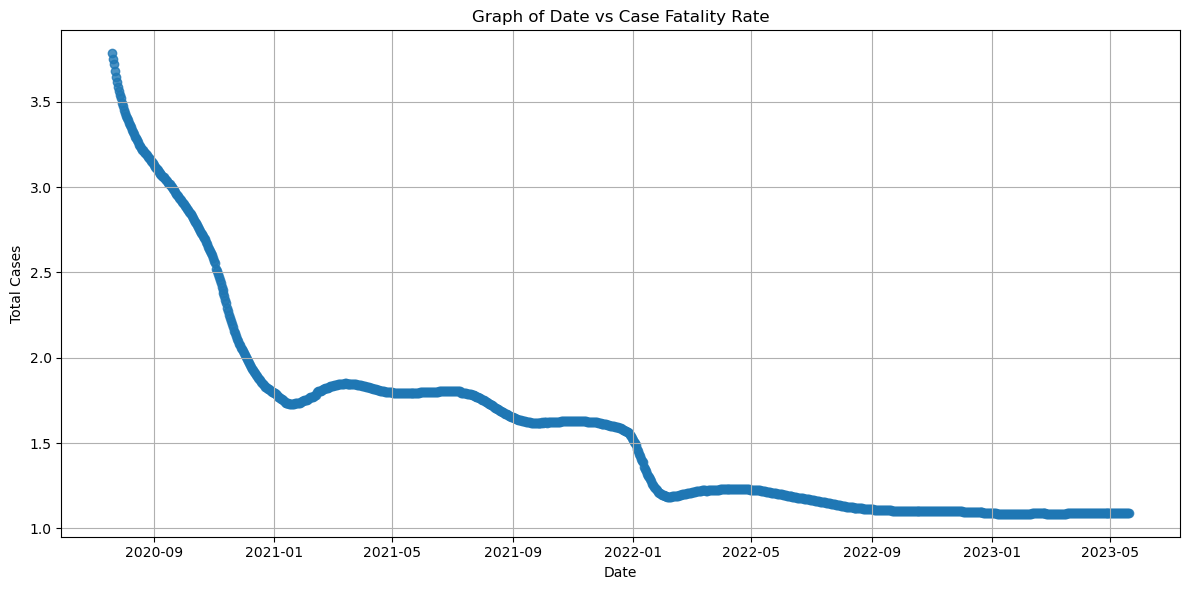

In [110]:
# Ensure the 'date' column is converted to a datetime format
covid_data['date'] = pd.to_datetime(covid_data['date'])

# Plot the graph of date vs new_cases
plt.figure(figsize=(12, 6))
plt.scatter(covid_data['date'], covid_data['new_cases'], marker='o', linestyle='-', alpha=0.8)
plt.title('Graph of Date vs New Cases')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the graph of date vs new_deaths
plt.figure(figsize=(12, 6))
plt.scatter(covid_data['date'], covid_data['new_deaths'], marker='o', linestyle='-', alpha=0.8)
plt.title('Graph of Date vs New Deaths')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the graph of date vs case_fatality_rate
plt.figure(figsize=(12, 6))
plt.scatter(covid_data['date'], covid_data['case_fatality_rate'], marker='o', linestyle='-', alpha=0.8)
plt.title('Graph of Date vs Case Fatality Rate')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.grid(True)
plt.tight_layout()
plt.show()

Date vs New Cases
- Significant spikes are visible in the data, most notably around January 2022 and smaller spikes in early 2021 and late 2022.
- These peaks likely correspond to surges in COVID-19 cases, possibly driven by new variants, increased testing, or waves of infection.
- The graph exhibits a periodic wave-like pattern, where cases increase sharply, peak, and then decline. These waves are likely driven by factors such as new variants, public health measures, vaccination campaigns, and seasonality.
- By early 2023, new cases appear to decline sharply and stabilize near zero. This could indicate effective vaccination efforts, herd immunity, or public health interventions reducing the spread.
- The tallest spike around January 2022 suggests an unprecedented surge in cases.

Date vs New Deaths

- There are prominent peaks in new deaths around early 2021, late 2021 to early 2022, and smaller spikes in mid-to-late 2022.
- The peak in early 2021 coincides with widespread waves of COVID-19 globally, potentially linked to early pandemic variants.
- The peak in early 2022 aligns with the spread of the Omicron variant, which, while less severe in most cases, still caused significant mortality due to its high transmission rates.
- The graph exhibits a periodic wave-like pattern, similar to the "new cases" graph, though the magnitude of peaks in deaths is smaller compared to new cases.
- New deaths decline substantially in 2023, stabilizing at or near zero. This trend likely reflects the impact of vaccinations, improved treatments, and public health measures.

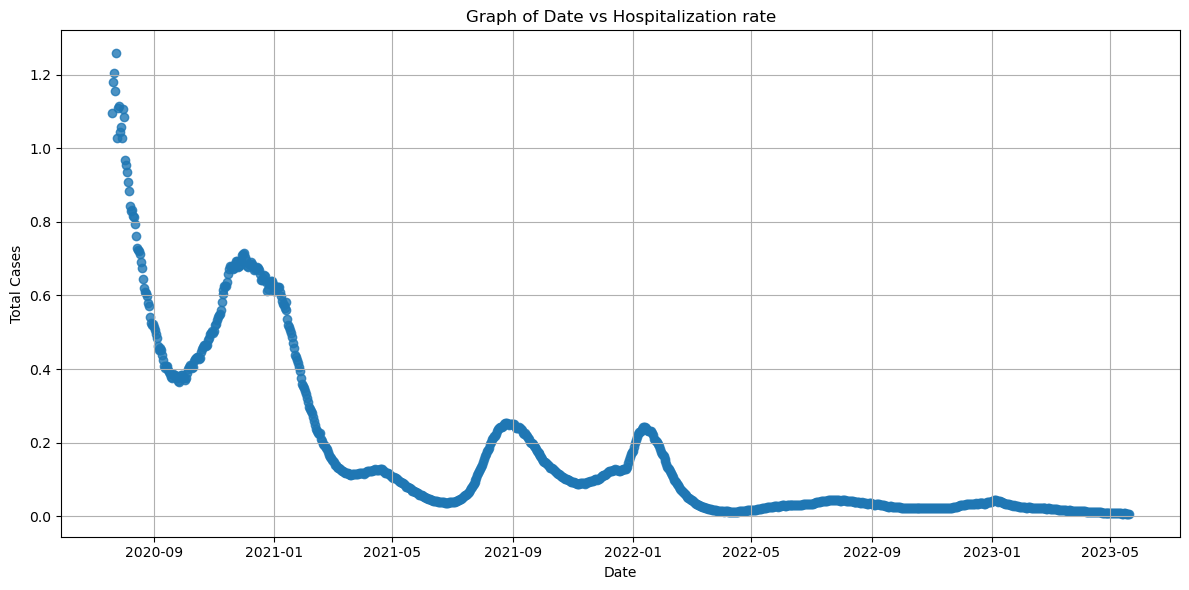

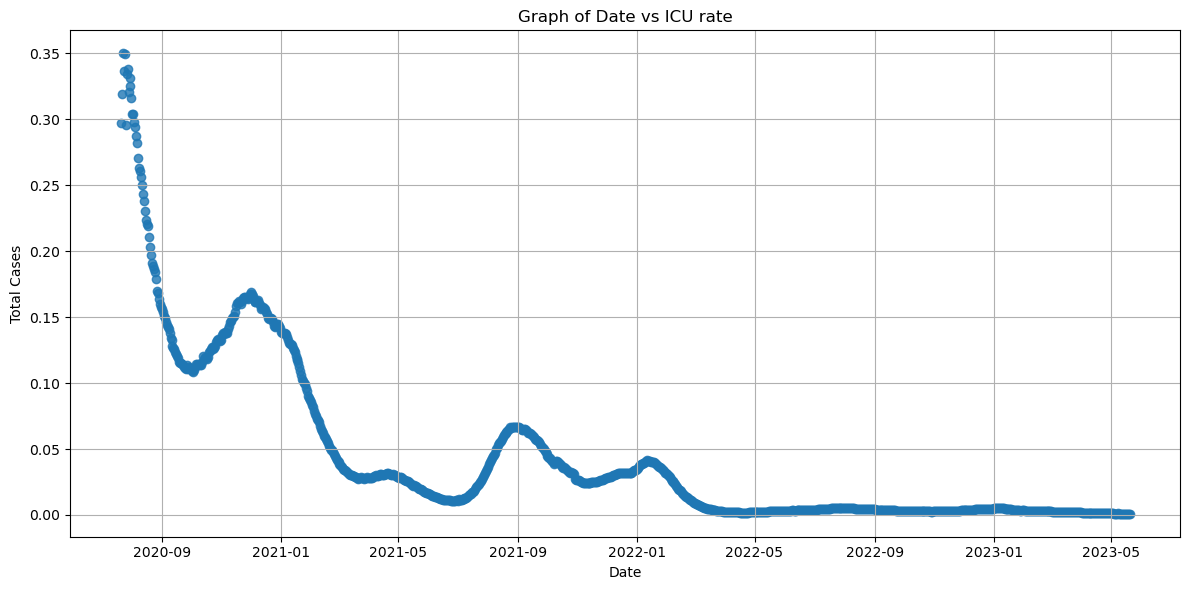

In [111]:
# Plot the graph of date vs hospitalization_rate
plt.figure(figsize=(12, 6))
plt.scatter(covid_data['date'], covid_data['hospitalization_rate'], marker='o', linestyle='-', alpha=0.8)
plt.title('Graph of Date vs Hospitalization rate')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the graph of date vs icu_rate
plt.figure(figsize=(12, 6))
plt.scatter(covid_data['date'], covid_data['icu_rate'], marker='o', linestyle='-', alpha=0.8)
plt.title('Graph of Date vs ICU rate')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.grid(True)
plt.tight_layout()
plt.show()

Date vs Hospitalization Rate

- At the start of the graph, the hospitalization rate is very high (above 1.2), likely due to the early stages of the pandemic when testing was limited, and only the most severe cases were identified and reported.
- The hospitalization rate decreases sharply, stabilizing around 0.4 by early 2021. Possibly a result of broader testing capturing more mild or asymptomatic cases and improved medical knowledge and treatments reducing the need for hospitalizations.
- Several peaks in hospitalization rates are visible, aligning with waves of COVID-19 cases
- By early 2023, the hospitalization rate flattens at very low levels, approaching zero. This suggests that severe cases became rarer, likely due to widespread immunity (vaccination and prior infections), better management, and milder variants.

Date vs ICU Rate

- The ICU rate starts at a high value (~0.35 or 35%). This is likely due to the early stages of the pandemic when testing was limited, and most reported cases were severe enough to require ICU care.
- A rapid decline in ICU rates is observed through late 2020, falling to around 0.15 (15%) by early 2021. This decrease reflects broader testing that included less severe cases, improved medical management, and possibly fewer hospitalizations due to awareness and public health interventions.
- Several smaller peaks in ICU rates occur in early 2021 and late 2021 to early 2022.
- By mid-2022 and beyond, the ICU rate flattens and stabilizes at very low levels (~0.02 or 2%), indicating a sustained reduction in the proportion of severe cases requiring ICU care.

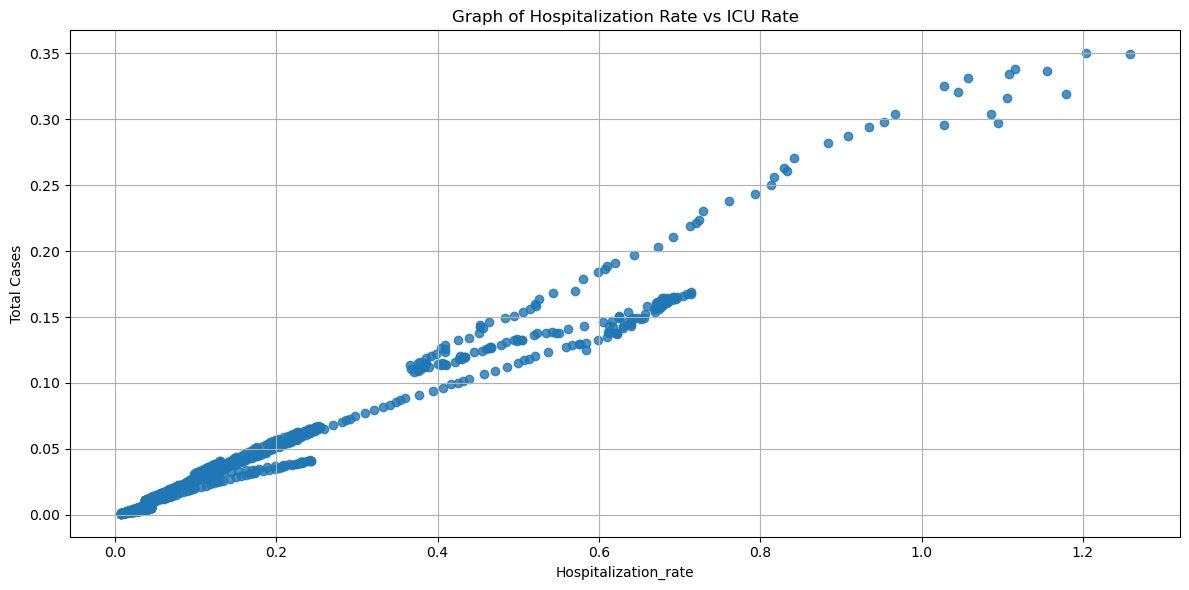

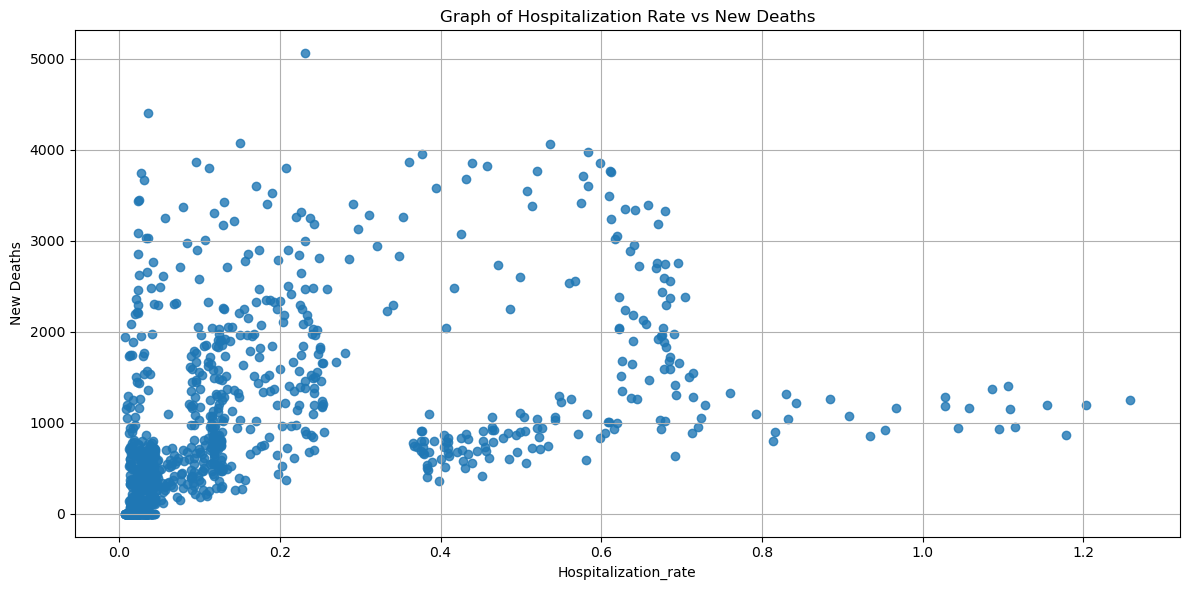

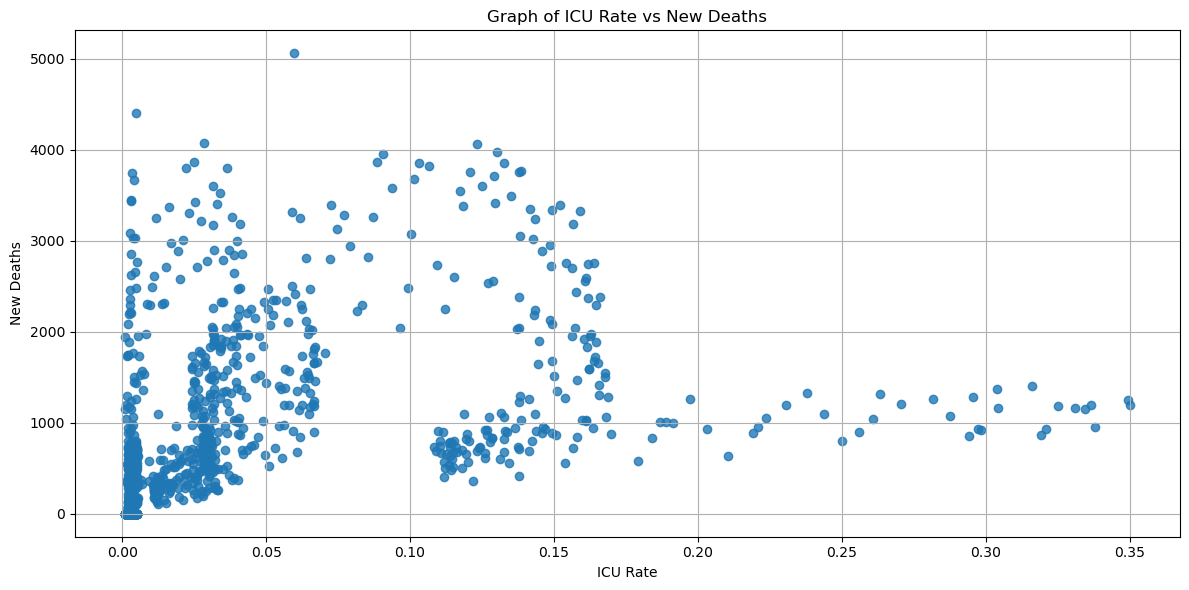

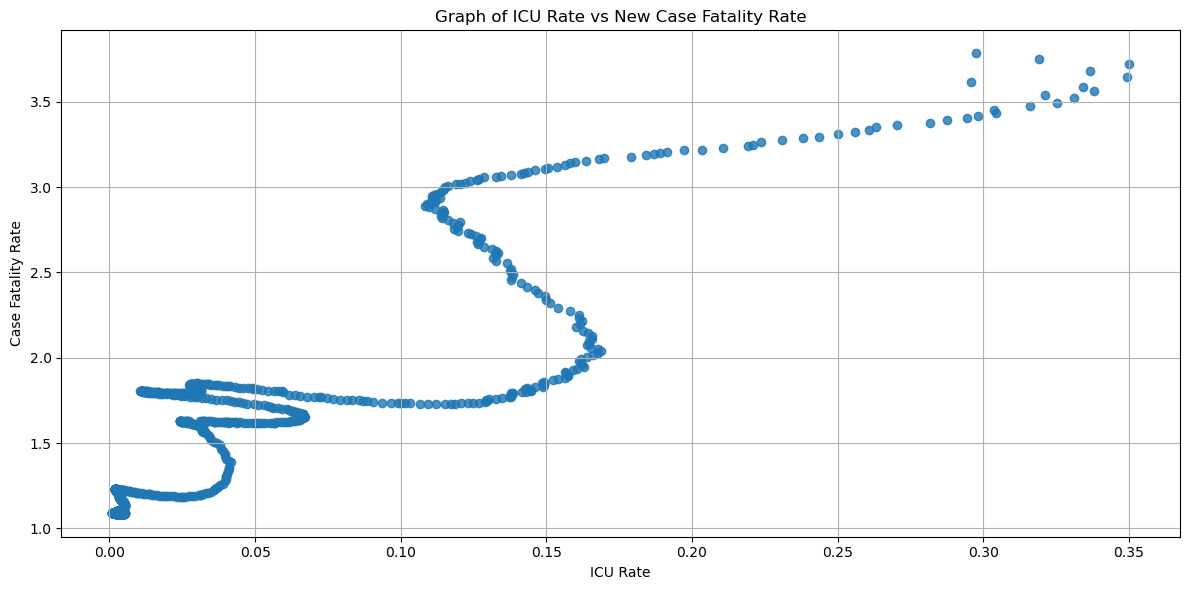

In [112]:

# Plot the graph of hospitalization_rate vs icu_rate
plt.figure(figsize=(12, 6))
plt.scatter(covid_data['hospitalization_rate'], covid_data['icu_rate'], marker='o', linestyle='-', alpha=0.8)
plt.title('Graph of Hospitalization Rate vs ICU Rate')
plt.xlabel('Hospitalization_rate')
plt.ylabel('Total Cases')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the graph of hospitalization_rate vs new_deaths
plt.figure(figsize=(12, 6))
plt.scatter(covid_data['hospitalization_rate'], covid_data['new_deaths'], marker='o', linestyle='-', alpha=0.8)
plt.title('Graph of Hospitalization Rate vs New Deaths')
plt.xlabel('Hospitalization_rate')
plt.ylabel('New Deaths')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the graph of icu_rate vs new_deaths
plt.figure(figsize=(12, 6))
plt.scatter(covid_data['icu_rate'], covid_data['new_deaths'], marker='o', linestyle='-', alpha=0.8)
plt.title('Graph of ICU Rate vs New Deaths')
plt.xlabel('ICU Rate')
plt.ylabel('New Deaths')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the graph of icu_rate vs case_fatality_rate
plt.figure(figsize=(12, 6))
plt.scatter(covid_data['icu_rate'], covid_data['case_fatality_rate'], marker='o', linestyle='-', alpha=0.8)
plt.title('Graph of ICU Rate vs New Case Fatality Rate')
plt.xlabel('ICU Rate')
plt.ylabel('Case Fatality Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

Hospitalization Rate vs ICU Rate
- The graph shows a clear upward trend, indicating a strong positive correlation between the hospitalization rate and the ICU rate.
- As the hospitalization rate increases, the ICU rate also rises, suggesting that a higher proportion of hospitalized cases are likely to require intensive care.
- The points form a nearly linear pattern, which implies a consistent proportional relationship between the two variables. In other words, the ICU rate tends to scale predictably with the hospitalization rate.
- A majority of the data points are clustered in the lower ranges of hospitalization and ICU rates (below 0.4 for hospitalization and 0.1 for ICU). This reflects the reality that most cases do not require hospitalization or ICU care.
- At the higher end of the hospitalization rate (above 1.0), the ICU rate also peaks around 0.35. These points likely represent extreme cases, such as during early surges when hospitals were overwhelmed, or in regions with limited healthcare resources.

ICU Rate vs New Deaths
- The relationship between ICU rate and new deaths is not strictly linear. Instead, there seems to be some clustering of data points, with notable variability in new deaths for the same ICU rate values.
- A dense cluster of points is observed at low ICU rates (below 0.05), with new deaths ranging widely (0 to over 2000). This reflects that most cases involve low ICU utilization, but even at these levels, new deaths can vary significantly.
- As the ICU rate increases, the number of new deaths tends to rise, peaking around ICU rates of 0.1–0.15.
- At very high ICU rates, new deaths are lower compared to the peak range. This might indicate cases where ICU resources were maximized or overwhelmed, affecting mortality reporting.

ICU Rate vs New Case Fatality Rate
- The graph shows a clear upward trend as the ICU rate increases, indicating a positive relationship between the proportion of ICU admissions and the case fatality rate. Higher ICU rates are associated with higher case fatality rates, which is expected because more ICU admissions suggest more severe cases.
- The relationship is not strictly linear. At low ICU rates (<0.10), the CFR fluctuates and remains relatively stable between 1.0% and 2.0%. At moderate ICU rates (0.10–0.20), there is a steeper rise in CFR, with values climbing beyond 2.5%, and at high ICU rates (>0.20), the CFR rises further, exceeding 3.0%.
- For ICU rates below 0.05, the CFR remains stable, showing minimal impact. This suggests that for lower ICU utilization, the overall mortality rate does not increase significantly, possibly due to less strain on healthcare resources.
- The CFR sharply increases when ICU rates exceed 0.15. This may indicate healthcare systems reaching capacity or ICU admissions consisting of more severe cases, leading to higher mortality rates.

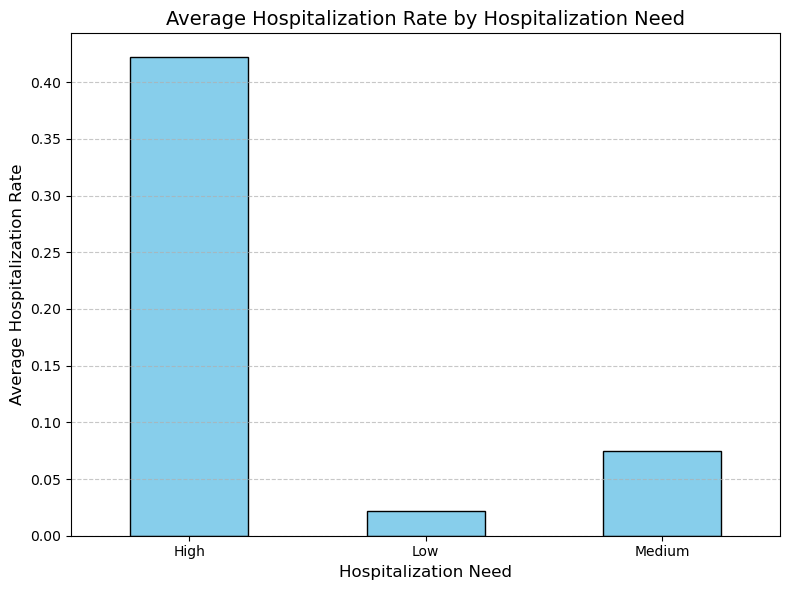

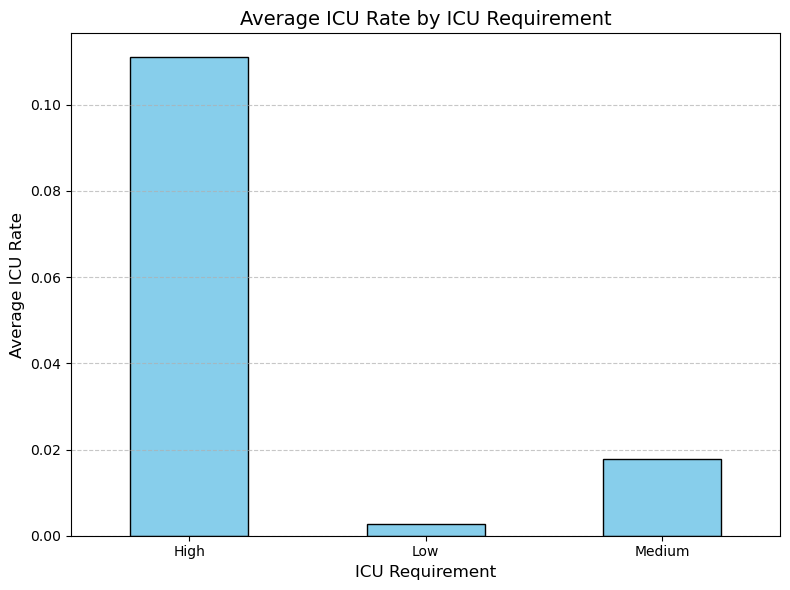

In [ ]:
# Group data by 'hospitalization_need' and calculate the mean of 'hospitalization_rate'
hospitalization_summary = covid_data.groupby('hospitalization_need')['hospitalization_rate'].mean()

plt.figure(figsize=(8, 6))
hospitalization_summary.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Average Hospitalization Rate by Hospitalization Need', fontsize=14)
plt.xlabel('Hospitalization Need', fontsize=12)
plt.ylabel('Average Hospitalization Rate', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Group data by 'icu_requirement' and calculate the mean of 'icu_rate'
icu_summary = covid_data.groupby('icu_requirement')['icu_rate'].mean()

plt.figure(figsize=(8, 6))
icu_summary.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Average ICU Rate by ICU Requirement', fontsize=14)
plt.xlabel('ICU Requirement', fontsize=12)
plt.ylabel('Average ICU Rate', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Hospitalization Rate by Hospitalization Need
- The bar for "High" hospitalization need is the tallest, with an average hospitalization rate of approximately 0.4 (40%). This indicates that cases classified as having a high hospitalization need are significantly more likely to result in hospitalization.
- The "Medium" hospitalization need category shows a moderate average hospitalization rate, around 0.1 (10%). This suggests that while the risk of hospitalization is lower than in the high-need category, it is still substantial compared to the low-need category.
- The "Low" hospitalization need category has the smallest bar, with an average hospitalization rate close to 0.02 (2%). This indicates that cases classified as having low hospitalization need are very unlikely to require hospitalization.


Average ICU Rate by ICU Requirement
- The "High" ICU requirement category has the tallest bar, with an average ICU rate of approximately 0.10 (10%). This indicates that cases classified with a high ICU requirement have a significantly greater likelihood of requiring intensive care.
- The "Medium" category shows an average ICU rate of about 0.03 (3%), which is considerably lower than the high requirement but still significant compared to the low category. This suggests a moderate probability of requiring ICU care for cases in this group.
- The "Low" ICU requirement category has the smallest bar, with an average ICU rate close to 0.01 (1%). This indicates that cases classified as low ICU requirement have a minimal likelihood of requiring intensive care.


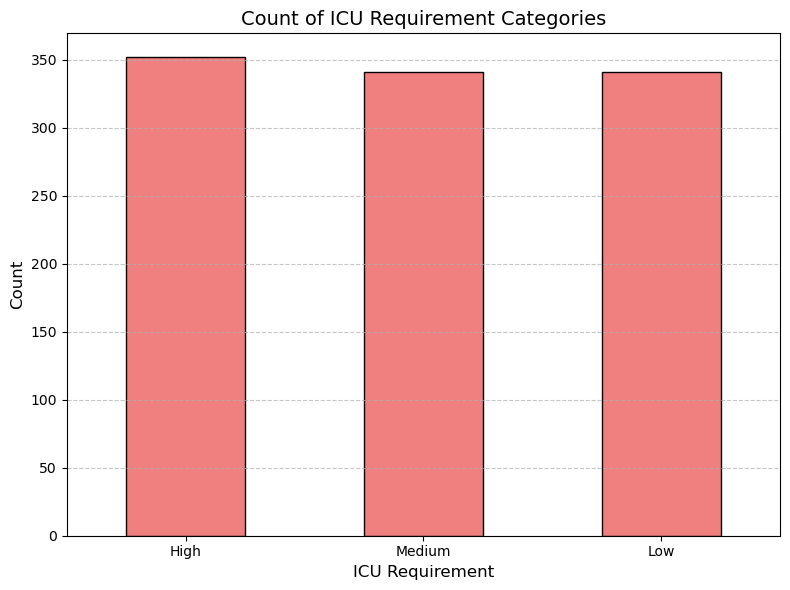

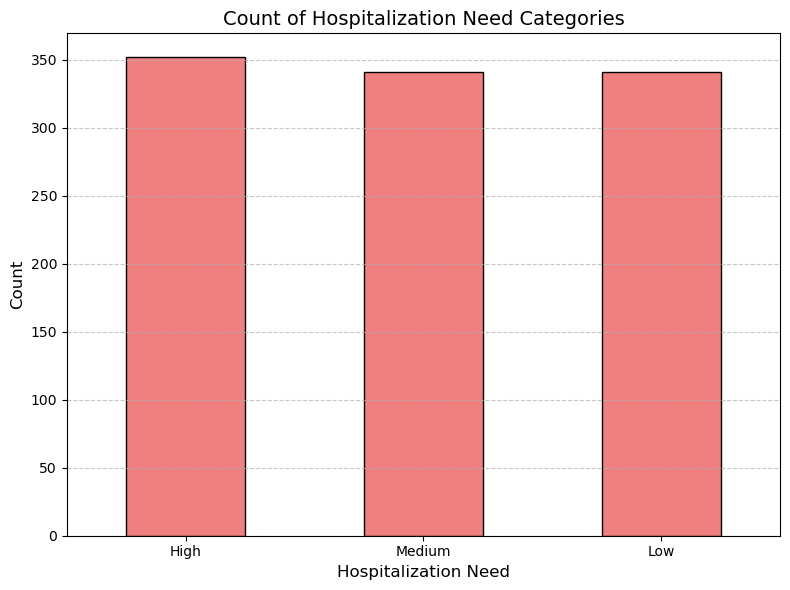

In [ ]:
# Count the number of instances for each ICU requirement category
icu_requirement_counts = covid_data['icu_requirement'].value_counts()

plt.figure(figsize=(8, 6))
icu_requirement_counts.plot(kind='bar', color='lightcoral', edgecolor='black')

plt.title('Count of ICU Requirement Categories', fontsize=14)
plt.xlabel('ICU Requirement', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Count the number of instances for each Hospital needs category
hospitalization_need_counts = covid_data['hospitalization_need'].value_counts()

plt.figure(figsize=(8, 6))
icu_requirement_counts.plot(kind='bar', color='lightcoral', edgecolor='black')

plt.title('Count of Hospitalization Need Categories', fontsize=14)
plt.xlabel('Hospitalization Need', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Count of ICU Requirement Categories
- The counts for all three categories (High, Medium, and Low) are nearly identical, each around 350 cases. This indicates a balanced dataset where the distribution of cases across ICU requirement levels is uniform.
- Since the counts are equal, there is no category dominating the data, which is useful for comparative analyses across the ICU requirement levels.

Count of Hospitalization Need Categories
- The counts for all three categories (High, Medium, and Low) are nearly identical, with approximately 350 cases in each category. This suggests that the dataset has been either intentionally balanced or naturally distributed evenly across the hospitalization need levels.
- All categories are represented equally, ensuring there is no overrepresentation or underrepresentation of any particular hospitalization need category.

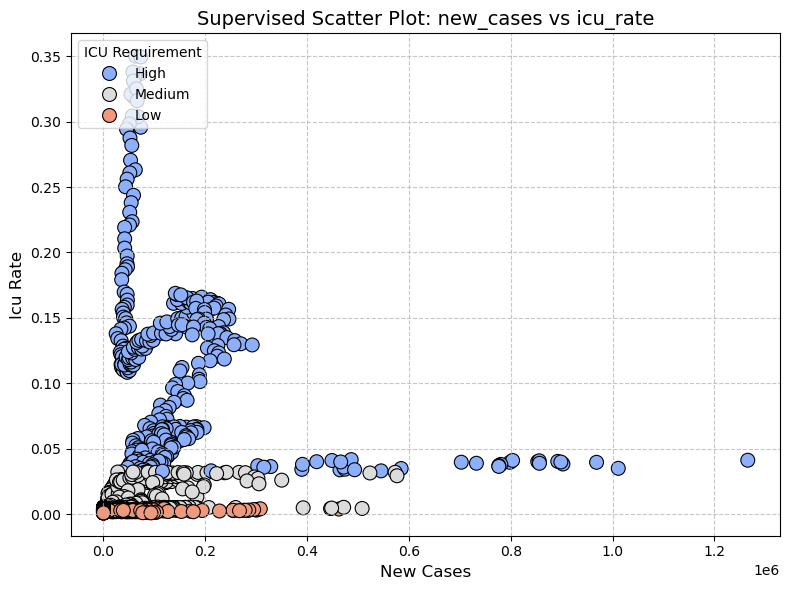

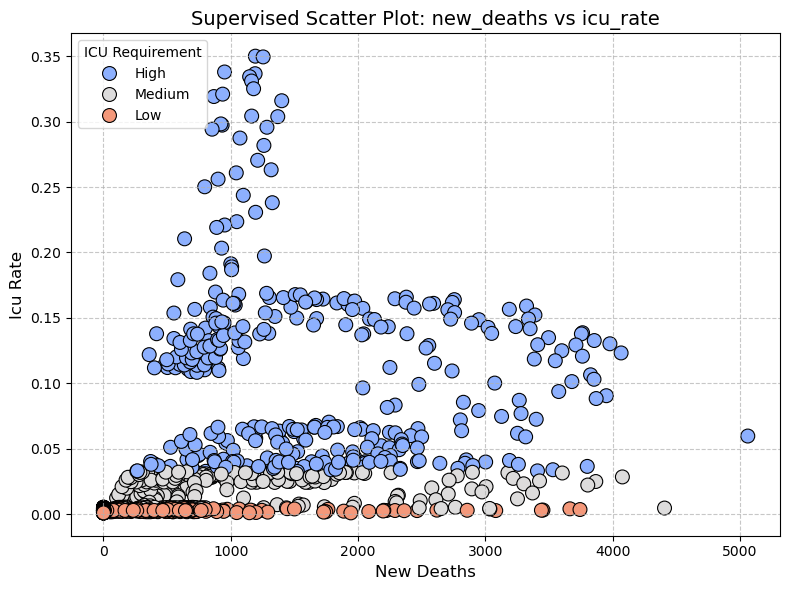

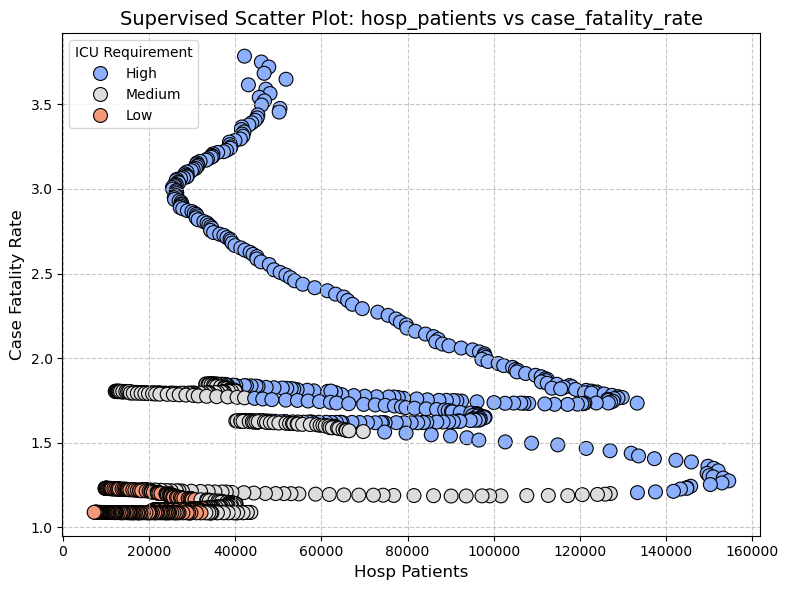

In [ ]:
attribute_pairs = [
    ('new_cases', 'icu_rate'),
    ('new_deaths', 'icu_rate'),
    ('hosp_patients', 'case_fatality_rate')
]

for x_attr, y_attr in attribute_pairs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x=x_attr,
        y=y_attr,
        hue='icu_requirement',
        palette='coolwarm',
        data=covid_data,
        s=100,
        edgecolor='black'
    )
    plt.title(f'Supervised Scatter Plot: {x_attr} vs {y_attr}', fontsize=14)
    plt.xlabel(x_attr.replace('_', ' ').title(), fontsize=12)
    plt.ylabel(y_attr.replace('_', ' ').title(), fontsize=12)
    plt.legend(title='ICU Requirement', loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

New Cases vs ICU Rate
- High ICU Requirement (Blue) points are concentrated at higher ICU rates (up to 0.35). Even at lower values of new cases, the ICU rate for this category is significantly higher.
- Medium ICU Requirement (Gray) points appears below the high category, with ICU rates generally not exceeding 0.10. The points are slightly dispersed across different new case counts, indicating variability in ICU rates for medium requirements.
- These points are clustered at the very bottom of the graph, with ICU rates close to zero. The low requirement category shows minimal association with ICU usage, regardless of the number of new cases.
- Most data points are concentrated in the lower range of new cases (below 0.4 million). A few points extend toward higher new case counts (up to 1.2 million), but these do not correlate with high ICU rates, suggesting that higher case counts may not always lead to a proportional increase in ICU utilization.
- As ICU requirement severity increases (Low → Medium → High), the ICU rate also increases consistently. 

Hospital Patients vs Case Fatality Rate
- High ICU Requirement (Blue) points are concentrated at higher ICU rates (up to 0.35) and spread across a wide range of new deaths, from 0 to over 4000.
- Gray points are clustered at lower ICU rates (below 0.10) and are distributed across a moderate range of new deaths, peaking around 3000 deaths.
- Orange points are concentrated at the lowest ICU rates (close to 0.00) and are generally associated with lower new death counts (mostly below 1000).
- As new deaths increase, ICU rates tend to rise, especially for the high ICU requirement category.
- For new death counts above 3000, ICU rates show significant variability, particularly within the high ICU requirement category. This could indicate differing regional healthcare capacities or varying case severities.

/var/folders/v8/m8d3fcvx1m5949l8bch0_qq80000gn/T/ipykernel_14089/331931893.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


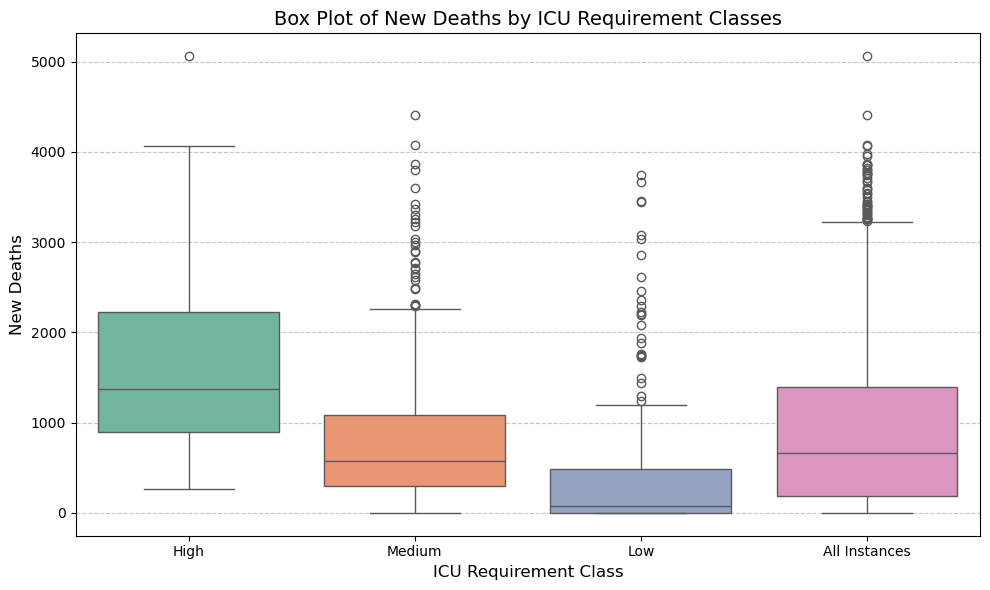

In [ ]:
# Box plot of new deaths by ICU requirement classes
covid_data_with_all = covid_data.copy()
covid_data_with_all['icu_requirement_group'] = covid_data_with_all['icu_requirement']
covid_data_with_all['icu_requirement_group'] = covid_data_with_all['icu_requirement_group'].fillna('All Instances')

all_instances = covid_data.copy()
all_instances['icu_requirement_group'] = 'All Instances'
covid_data_combined = pd.concat([covid_data_with_all, all_instances], ignore_index=True)

plt.figure(figsize=(10, 6))
sns.boxplot(
    x='icu_requirement_group',
    y='new_deaths',
    data=covid_data_combined,
    palette='Set2'
)

plt.title('Box Plot of New Deaths by ICU Requirement Classes', fontsize=14)
plt.xlabel('ICU Requirement Class', fontsize=12)
plt.ylabel('New Deaths', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

High ICU Requirement:
- Median: Around 1500 new deaths.
- Interquartile Range (IQR): Ranges between approximately 1000 and 2500.
- Whiskers: Extend from about 500 to 4000 new deaths.
- Outliers: A few extreme values exceed 4000 new deaths, with one outlier reaching 5000.
- This indicates that high ICU requirements are associated with higher median deaths and a wide range of variability.

Medium ICU Requirement:
- Median: Around 1000 new deaths.
- IQR: Between approximately 500 and 1500 new deaths.
- Whiskers: Extend from near 0 to around 2500, with numerous outliers above this range.
- This class shows a moderately lower median and narrower distribution compared to the high ICU requirement.

Low ICU Requirement:
- Median: Around 500 new deaths.
- IQR: Between approximately 250 and 1000.
- Whiskers: Extend from near 0 to around 1500, with several outliers exceeding this.
- This class demonstrates the lowest median and variability in new deaths.

All Instances:
- Median: Around 1000 new deaths.
- IQR: Similar to the medium requirement category but with a wider spread overall.
- Whiskers: Cover a broader range, capturing data from all classes, with many outliers exceeding 3000.

In [118]:
# Categorical Data Analysis
categorical_cols = covid_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(covid_data[col].value_counts().head())


Unique values in hospitalization_need:
hospitalization_need
High      352
Medium    341
Low       341
Name: count, dtype: int64

Unique values in icu_requirement:
icu_requirement
High      352
Medium    341
Low       341
Name: count, dtype: int64
